In [1]:
# EP5
import numpy as np
from tensorflow.keras.datasets import mnist

(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

# we will use vstack and append, so we need a 'start vector'
X_train = np.zeros((1, 28, 28))
y_train = np.zeros(1)

unique, counts = np.unique(y_train_all, return_counts=True)
for i in range (unique.shape[0]):
    temp_X = X_train_all[y_train_all == unique[i]]
    temp_y = y_train_all[y_train_all == unique[i]]
    # we selected just one class
    
    mask = np.append(np.ones(2000, dtype=bool),np.zeros(counts[i] - 2000, dtype=bool))
    np.random.shuffle(mask)
    temp_X = temp_X[mask]
    temp_y = temp_y[mask]
    # we selected 2000 random examples from this one class
    
    X_train = np.vstack((X_train, temp_X))
    y_train = np.append(y_train, temp_y)
    # we added then to our train set
    
X_train = np.delete(X_train, 0, 0) # this is the first line of zeros to the vstack and append command work
y_train = np.delete(y_train, 0)
X_train = X_train.reshape((20000, 28*28))
X_train = X_train/255
y_train = y_train.astype('uint8') # return to the original dtype
X_test = X_test.reshape((X_test.shape[0], 28*28))
X_test = X_test/255

# we shuffle the train set
train_shuffle = np.random.permutation(20000)
X_train = X_train[train_shuffle]
y_train = y_train[train_shuffle]

print('Dtype of train set, examples and labels:', X_train.dtype, y_train.dtype)
print('Dtype of test set,  examples and labels:', X_test.dtype, y_test.dtype)
print('Shape of train set, examples and labels:', X_train.shape, y_train.shape)
print('Shape of test set,  examples and labels:', X_test.shape, y_test.shape)
print('Min of train set,   examples and labels:', np.min(X_train), np.min(y_train))
print('Min of test set,    examples and labels:', np.min(X_test), np.min(y_test))
print('Max of train set,   examples and labels:', np.max(X_train), np.max(y_train))
print('Max of test set,    examples and labels:', np.max(X_test), np.max(y_test))

C:\Users\rafae\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rafae\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rafae\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rafae\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

Dtype of train set, examples and labels: float64 uint8
Dtype of test set,  examples and labels: float64 uint8
Shape of train set, examples and labels: (20000, 784) (20000,)
Shape of test set,  examples and labels: (10000, 784) (10000,)
Min of train set,   examples and labels: 0.0 0
Min of test set,    examples and labels: 0.0 0
Max of train set,   examples and labels: 1.0 9
Max of test set,    examples and labels: 1.0 9


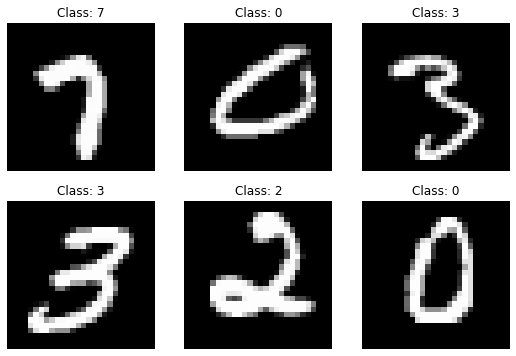

In [2]:
# print some random examples

import matplotlib.pyplot as plt
%matplotlib inline

random_sample = np.random.randint(20000, size=6)
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[random_sample[i]].reshape((28,28)), cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train[random_sample[i]])
    
plt.show()

In [3]:
# now we will prepare the data for the model selection

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fold = 0
for train_index, test_index in skf.split(X_train, y_train):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # X_train, X_test = X[train_index], X[test_index]
    y_train_fold = y_train[train_index]
    unique, count = np.unique(y_train_fold, return_counts=True)
    print("\nIn fold", fold, "we have:")
    fold = fold + 1
    for i in range (unique.shape[0]):
        print(count[i], "examples of class", unique[i])


In fold 0 we have:
1600 examples of class 0
1600 examples of class 1
1600 examples of class 2
1600 examples of class 3
1600 examples of class 4
1600 examples of class 5
1600 examples of class 6
1600 examples of class 7
1600 examples of class 8
1600 examples of class 9

In fold 1 we have:
1600 examples of class 0
1600 examples of class 1
1600 examples of class 2
1600 examples of class 3
1600 examples of class 4
1600 examples of class 5
1600 examples of class 6
1600 examples of class 7
1600 examples of class 8
1600 examples of class 9

In fold 2 we have:
1600 examples of class 0
1600 examples of class 1
1600 examples of class 2
1600 examples of class 3
1600 examples of class 4
1600 examples of class 5
1600 examples of class 6
1600 examples of class 7
1600 examples of class 8
1600 examples of class 9

In fold 3 we have:
1600 examples of class 0
1600 examples of class 1
1600 examples of class 2
1600 examples of class 3
1600 examples of class 4
1600 examples of class 5
1600 examples of cla

In [4]:
from sklearn.neural_network import MLPClassifier

# Here we will do some testing on the loss in function of the number of epochs

test_model = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', alpha = 0.0, max_iter=300)

loss_history = np.zeros(50)

test_model.partial_fit(X_train, y_train, np.unique(y_train))
loss_history[0] = test_model.loss_
for i in range(1, 50):
    test_model.partial_fit(X_train, y_train)
    loss_history[i] = test_model.loss_    

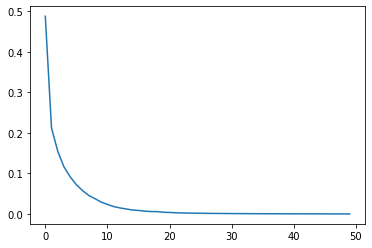

In [5]:
fig, ax = plt.subplots()  
ax.plot(loss_history)  

We now eye ball the curve, and find out that about 30 epochs, the loss almost don't improve, so we will use this as our stopping point for all our models

### Model 1
The mandatory example, with one single hiden layer with 512 neurons of activation reLU

### Model 2
We will multiple layers but reduce the number of neurons on each layer. The shape is (128, 128, 128, 64, 64), and the activation is still reLU

### Model 3
Same as model 1, with layer of shape (512,), but we will change the activation function to the logistic.

In [6]:
from sklearn.model_selection import cross_validate

model_1 = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', 
                        max_iter=30, tol=0.00001)
model_2 = MLPClassifier(hidden_layer_sizes=(128, 128, 128, 64, 64), activation='relu',
                        max_iter=30, tol=0.00001)
model_3 = MLPClassifier(hidden_layer_sizes=(512,),  activation='logistic',
                        max_iter=30, tol=0.00001)


model_1_results = cross_validate(model_1, X_train, y_train, cv=skf, n_jobs=3, verbose = 3)
model_2_results = cross_validate(model_2, X_train, y_train, cv=skf, n_jobs=3, verbose = 3)
model_3_results = cross_validate(model_3, X_train, y_train, cv=skf, n_jobs=3, verbose = 3)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  3.4min remaining:  5.0min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  5.8min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:   57.4s remaining:  1.4min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  3.3min remaining:  4.9min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  6.3min finished


In [7]:
print('Results for Model 1:')
for i in range (model_1_results['test_score'].shape[0]):
    print('For fold', i, 'the score was: ', model_1_results['test_score'][i])
print('The average value is', np.mean(model_1_results['test_score']))

print('\nResults for Model 2:')
for i in range (model_2_results['test_score'].shape[0]):
    print('For fold', i, 'the score was: ', model_2_results['test_score'][i])
print('The average value is', np.mean(model_2_results['test_score']))

print('\nResults for Model 3:')
for i in range (model_3_results['test_score'].shape[0]):
    print('For fold', i, 'the score was: ', model_3_results['test_score'][i])
print('The average value is', np.mean(model_3_results['test_score']))

Results for Model 1:
For fold 0 the score was:  0.97125
For fold 1 the score was:  0.967
For fold 2 the score was:  0.965
For fold 3 the score was:  0.96975
For fold 4 the score was:  0.97025
The average value is 0.9686499999999999

Results for Model 2:
For fold 0 the score was:  0.96725
For fold 1 the score was:  0.96525
For fold 2 the score was:  0.96375
For fold 3 the score was:  0.9635
For fold 4 the score was:  0.96575
The average value is 0.9651

Results for Model 3:
For fold 0 the score was:  0.9625
For fold 1 the score was:  0.95575
For fold 2 the score was:  0.95325
For fold 3 the score was:  0.95825
For fold 4 the score was:  0.958
The average value is 0.95755


Now, looking at the results, we will choose Model 1, since it have the best mean score and it don't fluctuate much between the folds

In [8]:
model_final = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', 
                         max_iter=30, tol=0.00001)

model_final_loss_history = np.zeros(30)

model_final.partial_fit(X_train, y_train, np.unique(y_train))
model_final_loss_history[0] = model_final.loss_
for i in range(1, 30):
    model_final.partial_fit(X_train, y_train)
    model_final_loss_history[i] = model_final.loss_    

final loss: 0.0016548472344783047


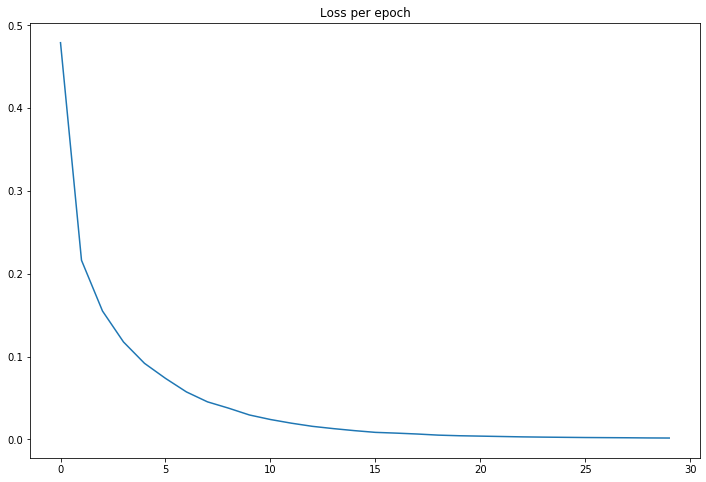

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Loss per epoch')
ax.plot(model_final_loss_history)
print('final loss:', model_final_loss_history[29])

In [10]:
unique_test, count_test = np.unique(y_test, return_counts=True)
for i in range (unique_test.shape[0]):
    print('The number of examples of class', unique_test[i], 'is:', count_test[i])

The number of examples of class 0 is: 980
The number of examples of class 1 is: 1135
The number of examples of class 2 is: 1032
The number of examples of class 3 is: 1010
The number of examples of class 4 is: 982
The number of examples of class 5 is: 892
The number of examples of class 6 is: 958
The number of examples of class 7 is: 1028
The number of examples of class 8 is: 974
The number of examples of class 9 is: 1009


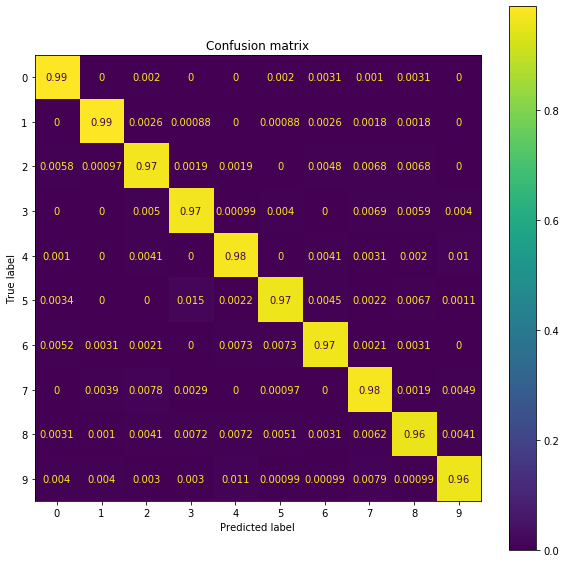

In [18]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion matrix')
plot_confusion_matrix(model_final, X_test, y_test, normalize='true', ax=ax)

It's funny to see that the 4 is more misclassified as a 9 and the 9 is more misclassified as a 4.